In [1]:
# Open my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

### Installing Dataset to Drive

In [7]:
# install_packages
install_packages = True
if install_packages:
    %pip install pandas pillow numpy scipy matplotlib wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ddb05038985156839d671282902ad2a331e11f283c95355228fe22694d1dbeff
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Get on colab lighter_authors.json
import wget
authors = wget.download("https://adm2023.s3.amazonaws.com/lighter_authors.json")

In [ ]:
# Get on colab lighter_books.json
books = wget.download("https://adm2023.s3.amazonaws.com/lighter_books.json")

In [ ]:
# Move the datasets from colab to my drive, so i can reuse it when i close the page of colab (without going to ridownload the datasets)
import shutil

# Source path
source_authors = '/content/lighter_authors.json'
source_books = '/content/lighter_books.json'

# Destination path
destination = '/content/drive/MyDrive/Dataset HW2'

# Move the content of
# source to destination
dest = shutil.move(source_books, destination)

In [ ]:
dest = shutil.move(source_authors, destination)

In [ ]:
# Get only the first 200.000 rows of books dataset so the ram of my colab didn't blow up
import pandas as pd
df_books = pd.read_json('/content/lighter_books.json', lines = True, nrows = 200000)

In [ ]:
for chunk in pd.read_json('/content/lighter_books.json', lines = True, chunksize=10000):
  print(chunk.head())
  break

   id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   

                                             authors   author_name  author_id  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
2                                               None  J.K. Rowling    1077326   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   

   work_id        isbn         isbn13 asin language  ...  \
0  2809203  0439358078  9780439358071           eng  ...   
1  4640799                      

### RQ1 & RQ2


In [ ]:
# Get authors dataset on my colab
df_authors = pd.read_json('/content/lighter_authors.json', lines = True)

**[RQ1]** Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

In [ ]:
# Summary Statistics: Compute basic statistics for each variable, such as mean, median, mode, variance, standard deviation, minimum & maximum.
# Histograms: Create histograms to visualize the distribution of numerical variables.
# Bar Charts: Use bar charts for categorical variables to show the distribution of categories.
df_books.info()
df_books.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199963 entries, 0 to 199962
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         199963 non-null  int64  
 1   title                      199963 non-null  object 
 2   authors                    67568 non-null   object 
 3   author_name                199963 non-null  object 
 4   author_id                  199963 non-null  int64  
 5   work_id                    199963 non-null  int64  
 6   isbn                       199963 non-null  object 
 7   isbn13                     199963 non-null  object 
 8   asin                       199963 non-null  object 
 9   language                   199963 non-null  object 
 10  average_rating             199963 non-null  float64
 11  rating_dist                199963 non-null  object 
 12  ratings_count              199963 non-null  int64  
 13  text_reviews_count         19

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,199963.00000,1.999630e+05,1.999630e+05,199963.000000,1.999630e+05,199963.000000
mean,188388.94656,7.686039e+05,2.828280e+06,3.790865,3.349555e+04,929.407135
std,119155.38981,2.439785e+06,9.296696e+06,0.775540,2.266466e+05,4793.556750
min,2.00000,4.000000e+00,6.200000e+01,0.000000,0.000000e+00,0.000000
25%,82296.50000,9.885000e+03,1.530855e+05,3.680000,3.200000e+01,3.000000
50%,180137.00000,3.807300e+04,3.307460e+05,3.920000,2.910000e+02,23.000000
75%,290585.00000,1.357480e+05,1.519321e+06,4.130000,3.113000e+03,174.000000
max,407169.00000,2.113634e+07,8.972161e+07,5.000000,7.377351e+06,116930.000000


<Axes: ylabel='Frequency'>

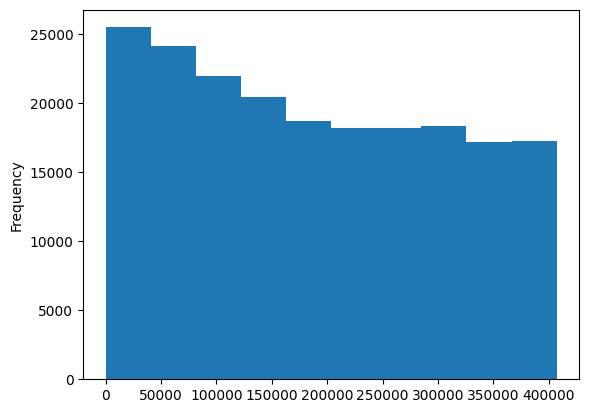

In [ ]:
df_books.id.plot.hist()

<Axes: ylabel='Frequency'>

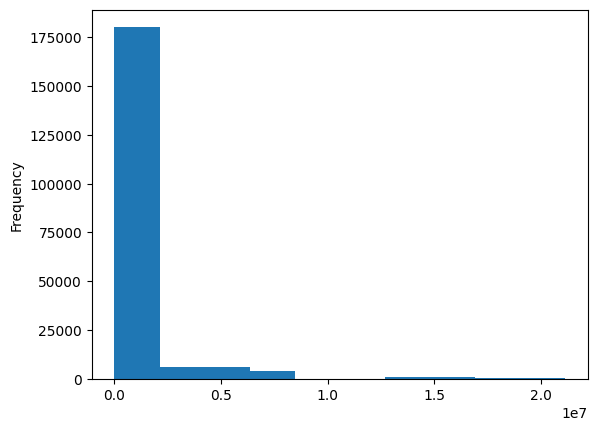

In [ ]:
df_books.author_id.plot.hist()

<Axes: ylabel='Frequency'>

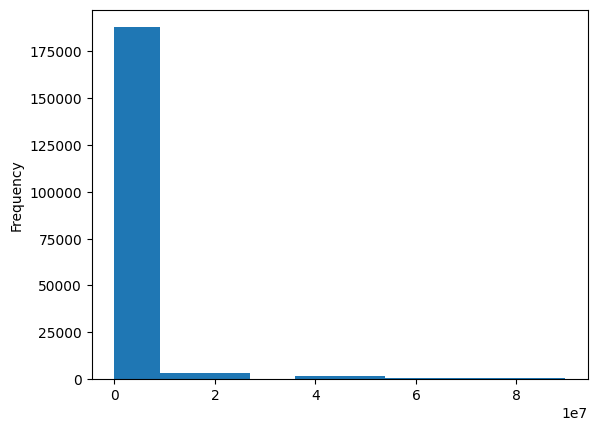

In [ ]:
df_books.work_id.plot.hist()


<Axes: ylabel='Frequency'>

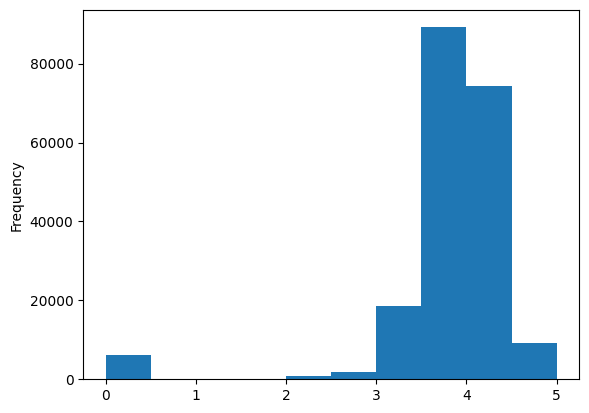

In [ ]:
df_books.average_rating.plot.hist()


<Axes: ylabel='Frequency'>

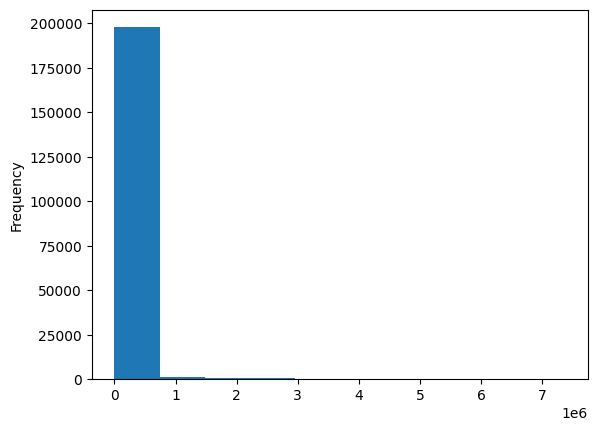

In [ ]:
df_books.ratings_count.plot.hist()


<Axes: ylabel='Frequency'>

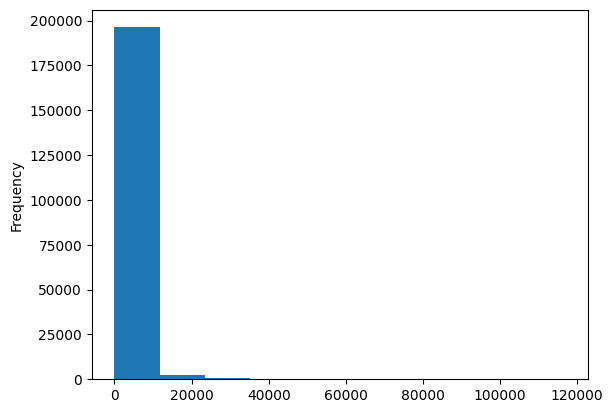

In [ ]:
df_books.text_reviews_count.plot.hist()

In [ ]:
df_books['language'].value_counts().plot(kind='bar', color='green')

NameError: ignored

In [ ]:
df_authors.info()
df_authors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


<Axes: ylabel='Frequency'>

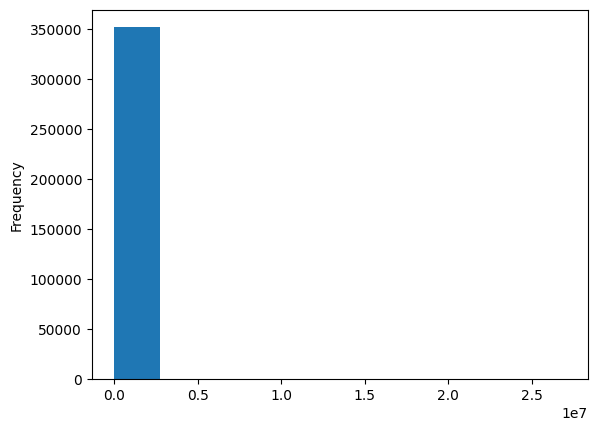

In [ ]:
df_authors.ratings_count.plot.hist()

<Axes: ylabel='Frequency'>

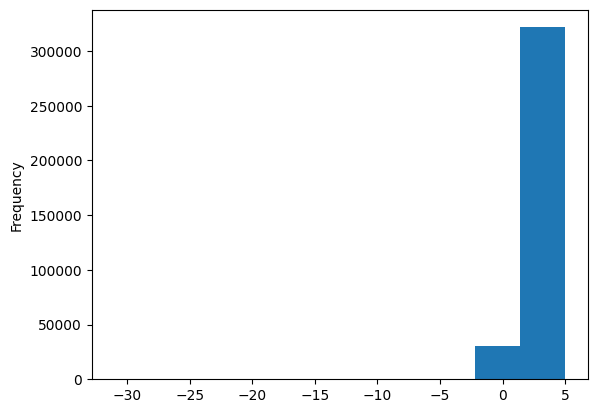

In [ ]:
df_authors.average_rating .plot.hist()

<Axes: ylabel='Frequency'>

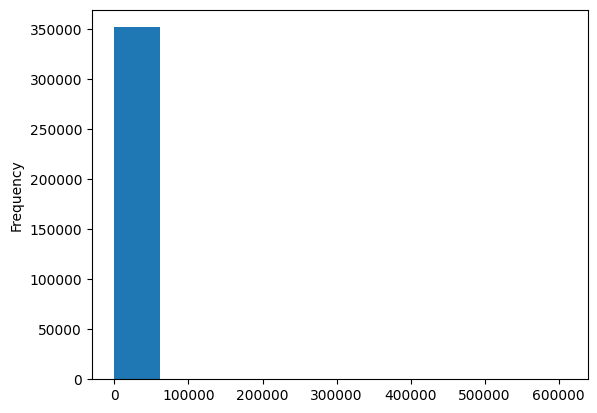

In [ ]:
df_authors.text_reviews_count.plot.hist()

<Axes: ylabel='Frequency'>

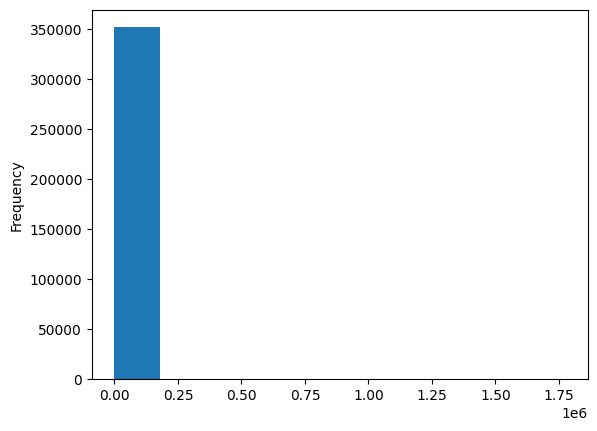

In [ ]:
df_authors.works_count.plot.hist()

<Axes: ylabel='Frequency'>

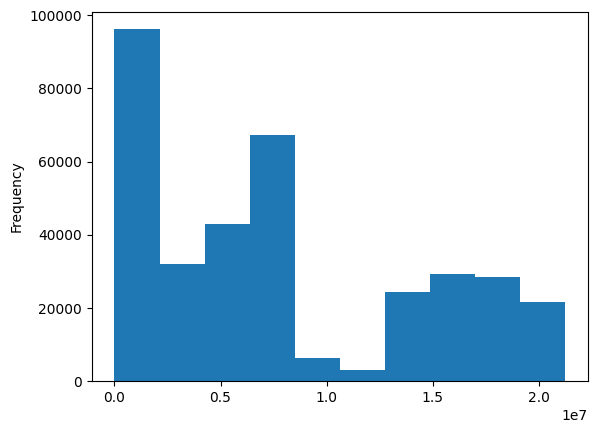

In [ ]:
df_authors.id.plot.hist()

<Axes: ylabel='Frequency'>

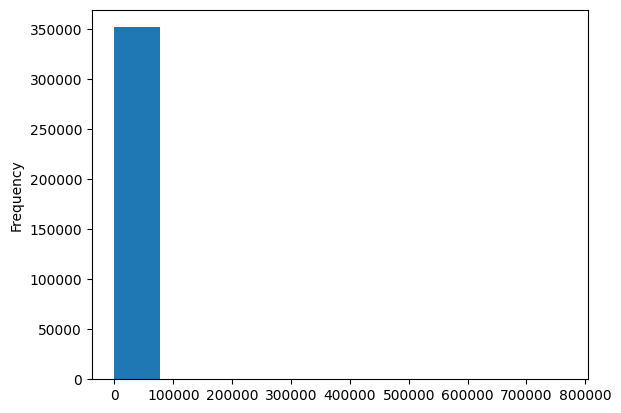

In [ ]:
df_authors.fans_count.plot.hist()

In [ ]:
#Plot the number of books for each author in descending order.
#Fai istogramma.
num_books_byauthor = df_books.groupby('author_name').size()
num_books_byauthor = num_books_byauthor.sort_values(ascending=False)
print(num_books_byauthor)

author_name
William Shakespeare    998
Anonymous              871
Stephen King           533
R.L. Stine             448
Agatha Christie        387
                      ... 
John   Kelly             1
John   Howard            1
John   Hammond           1
John   Hagan             1
西西                       1
Length: 37327, dtype: int64


In [ ]:
#Which book has the highest number of reviews?
max_ratingscount=0
title=None
for chunk in pd.read_json('/content/lighter_books.json', lines = True, chunksize=10000):
    v=chunk[chunk.ratings_count == chunk.ratings_count.max()].head(1)
    if v.ratings_count.max() > max_ratingscount:
      max_ratingscount=v.ratings_count.max()
      title=v.title
      break
print(title)

#Result: 5236525    Harry Potter und der Stein der Weisen (Harry P...
#Name: title, dtype: object


1    Harry Potter and the Sorcerer's Stone (Harry P...
Name: title, dtype: object


In [ ]:
#Which are the top ten and ten worst books concerning the average score?
#Crea una lista dove ad ogni for aggiungi i risultati di ogni chunk,
#e poi a fine for estrai dalla lista i primi 10 e gli ultimi 10
for chunk in pd.read_json('/content/lighter_books.json', lines = True, chunksize=10000):
    sorted_ratings= chunk.sort_values(by='average_rating', ascending=False)
#Top ten concerning the average score
    print(sorted_ratings['title'].head(10))
#Worst ten concerning the average score
    print(sorted_ratings['title'].tail(10))
    break


177503    Jan's Rainbow: Stories of Hope; How Those We H...
136399    Everybody Wants to Go to Heaven: Six Steps to ...
185617               Airship Aerodynamics: Technical Manual
2694      The Travels of the Prophet Ibrahim (Quran Stor...
136320    The Collected Works Of Samuel Taylor Coleridge...
101723                             Tale of the Missing Head
136319    Sir Henry Irving: A Victorian Actor and His World
101782    Mad About The Boy: The Life And Times Of Boy G...
185535    Public Speaking: A Guide for the Engaged Commu...
185534     Public Speaking with Student CD-ROM and PowerWeb
Name: title, dtype: object
157739        Quality of Life: Concept, Policy and Practice
181610    Vision And Realisation: A Centenary History Of...
132916    Handbook for travellers in Switzerland, 1838 (...
157724    A Cat Called Max: Max and the Quiz Kids (Arch ...
18933     20 Ans De Théories Féministes Sur Le Cinéma...
142246                                     Uncompleted Past
131402    To Sla

In [ ]:
#Explore the different languages in the book’s dataset,
#providing a proper chart summarizing how these languages are distributed throughout our virtual library.



### RQ3

#### RQ3.1
Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.



In [49]:
def preprocess_data(df):
    """
    Preprocesses the input DataFrame by cleaning and transforming the data.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the data to be preprocessed.

    Returns:
        df (pandas.DataFrame): The preprocessed DataFrame after performing the following operations:
            - Drops the 'authors' column from the DataFrame.
            - Removes rows with missing values.
            - Converts all columns to string type.
            - Splits the 'publication_date' column into separate 'year', 'month', and 'day' columns based on the '-' delimiter.
            - Converts 'year' and 'month' columns to numeric type.
            - Removes rows with NaN values in 'year' and 'month'.
            - Filters the DataFrame to include records with a 'year' less than or equal to 2023.
            - Converts 'year', 'month', and 'num_pages' columns to 'Int64' type.
            - Removes rows with missing values in the 'num_pages' column.
    """
    columns_to_drop = ['authors', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'rating_dist',
       'ratings_count', 'text_reviews_count',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'series_id', 'series_name',
       'series_position', 'shelves', 'description']
    df = df.drop(columns_to_drop, axis=1)
    df.dropna(inplace=True)
    df = df.astype(str)
    df.drop_duplicates(inplace=True)

    # Split 'publication_date' into 'year' and 'month' based on '-'
    df[['year', 'month', 'day']] = df['publication_date'].str.split('-', expand=True)

    # Convert year and month to numeric
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['month'] = pd.to_numeric(df['month'], errors='coerce')
    df.dropna(inplace=True)

    df = df[df['year'] <= 2023]

    # Convert 'year', 'month' and 'num_pages' to Int64
    df['year'] = df['year'].astype('Int64')
    df['month'] = df['month'].astype('Int64')
    df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce').astype('Int64')
    df = df[pd.notnull(df['num_pages'])]

    return df


In [3]:
def RQ3(df, year):
    """
    Analyzes a DataFrame to extract insights for a specific year.

    Args:
        df (pandas.DataFrame): The input DataFrame containing book-related data.
        year (int): The specific year for which data analysis is conducted.

    Returns:
        Tuple containing the following elements:
        - number_books (int): The number of unique books published in the provided year.
        - number_pages (int): The total number of pages from all books published in the provided year.
        - prolific_month (int): The month with the highest number of books published in the provided year.
        - book_with_max_pages (str): The title of the book with the highest number of pages published in the provided year.
        - num_book_with_max_pages (int): The number of pages of the book with the highest number of pages published in the provided year.
        - books_per_month (pandas.DataFrame): DataFrame showing the count of books published per month in the provided year.

    """
    df_year = df[df['year'] == year]
    number_books = df_year['id'].nunique()
    number_pages = df_year['num_pages'].sum()
    books_per_month = df_year.groupby('month').size().reset_index(name='books_published')

    prolific_month = books_per_month[books_per_month['books_published'] == books_per_month['books_published'].max()]['month'].values[0]

    max_page_index = df_year['num_pages'].idxmax()
    num_book_with_max_pages = df_year.loc[max_page_index, 'num_pages']
    book_with_max_pages = df_year.loc[max_page_index, 'title']

    return number_books, number_pages, prolific_month, book_with_max_pages, num_book_with_max_pages, books_per_month



#### RQ3.2
Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [4]:
def build_df(df):
    """
    Builds a summary DataFrame containing yearly book-related statistics.

    Args:
        df (pandas.DataFrame): The input DataFrame containing book-related data for different years.

    Returns:
        pandas.DataFrame: A summary DataFrame with yearly statistics based on the provided data. The DataFrame includes the following columns:
        - 'year': The year corresponding to the statistics.
        - 'number_books': The total number of unique books published in each year.
        - 'number_pages': The total number of pages from all books published in each year.
        - 'prolific_month': The month with the highest number of books published in each year.
        - 'book_with_max_pages': The title of the book with the highest number of pages published in each year.
        - 'num_book_with_max_pages': The number of pages of the book with the highest page count published in each year.
        - Columns '1' to '12' (representing months): The count of books published per month in each year.

    Note:
        This function utilizes the 'RQ3' function to compute statistics for each year and creates a summary DataFrame. Ensure the input DataFrame 'df' contains relevant columns such as 'year', 'id', 'num_pages', 'month', and 'title' for accurate analysis.
    """

    years = df['year'].unique()
    new_df = pd.DataFrame(columns=['year', 'number_books', 'number_pages', 'prolific_month', 'book_with_max_pages', 'num_book_with_max_pages', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

    for i in range(len(years)):
        number_books, number_pages, prolific_month, book_with_max_pages, num_book_with_max_pages, books_per_month = RQ3(df, years[i])

        new_row = {'year': years[i],
                   'number_books': number_books,
                   'number_pages': number_pages,
                   'prolific_month': prolific_month,
                   'book_with_max_pages': book_with_max_pages,
                   'num_book_with_max_pages': num_book_with_max_pages}

        # Add columns for books published per month
        for index, row in books_per_month.iterrows():
            month = row['month']
            books_published = row['books_published']
            new_row[str(month)] = books_published

        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)

    new_df = new_df.fillna(0)
    new_df = new_df.sort_values(by=['year'])
    return new_df


In [5]:
def merge_dataframes(new_df1, new_df2):
    """
    Merges and consolidates two DataFrames containing book-related statistics into a single comprehensive DataFrame.

    Args:
        new_df1 (pandas.DataFrame): The first DataFrame containing book-related statistics.
        new_df2 (pandas.DataFrame): The second DataFrame containing book-related statistics.

    Returns:
        pandas.DataFrame: A merged DataFrame consolidating statistics from 'new_df1' and 'new_df2'. The merged DataFrame includes columns representing combined statistics, such as:
        - 'year': The year corresponding to the statistics.
        - 'number_books': Total number of unique books published for each year in both DataFrames.
        - 'number_pages': Total number of pages from all books published for each year in both DataFrames.
        - 'prolific_month': The most prolific month in each year based on combined data.
        - 'book_with_max_pages': The title of the book with the highest number of pages published in each year from both DataFrames.
        - 'num_book_with_max_pages': The number of pages of the book with the highest page count in each year from both DataFrames.
        - Columns '1' to '12' (representing months): Total count of books published per month in each year from both DataFrames.

    Note:
        This function performs an outer merge of 'new_df1' and 'new_df2' DataFrames based on the 'year' column. It then consolidates and computes combined statistics to generate a single DataFrame.
    """

    merged_df = pd.merge(new_df1, new_df2, on='year', how='outer', suffixes=('_df1', '_df2'))

    merged_df['number_books'] = merged_df['number_books_df1'].fillna(0) + merged_df['number_books_df2'].fillna(0)
    merged_df['number_pages'] = merged_df['number_pages_df1'].fillna(0) + merged_df['number_pages_df2'].fillna(0)

    merged_df['book_with_max_pages'] = np.where(
        merged_df['num_book_with_max_pages_df1'].fillna(0) >= merged_df['num_book_with_max_pages_df2'].fillna(0),
        merged_df['book_with_max_pages_df1'],
        merged_df['book_with_max_pages_df2']
    )

    merged_df['num_book_with_max_pages'] = merged_df[['num_book_with_max_pages_df1', 'num_book_with_max_pages_df2']].max(axis=1)

    months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    for month in months:
        merged_df[month] = merged_df[month + '_df1'].fillna(0) + merged_df[month + '_df2'].fillna(0)

    merged_df['prolific_month'] = merged_df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].idxmax(axis=1)

    cols_to_drop = [col for col in merged_df.columns if '_df1' in col or '_df2' in col]
    merged_df.drop(columns=cols_to_drop, inplace=True)

    columns_to_convert = ['number_books', 'number_pages', 'prolific_month', 'num_book_with_max_pages', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

    merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(int)

    merged_df = merged_df.sort_values(by=['year'])

    return merged_df


In [10]:
# Define the chunk size
chunk_size = 10000

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)

is_first = True
for chunk in json_reader:
    if is_first:
        main = preprocess_data(chunk)
        main = build_df(main)
        is_first = False

    current = preprocess_data(chunk)
    current = build_df(current)
    main = merge_dataframes(main, current)

<ipython-input-2-e0c8be33e35c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('Int64')
<ipython-input-2-e0c8be33e35c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('Int64')


In [31]:
main.to_pickle('books_data_final.pkl')

In [32]:
import shutil

# Source path
source_books = '/content/books_data_final.pkl'

# Destination path
destination = '/content/drive/MyDrive/Dataset HW2'

# Move the content of
# source to destination
dest = shutil.move(source_books, destination)

In [11]:
main.head(10)

,year,number_books,number_pages,book_with_max_pages,num_book_with_max_pages,1,2,3,4,5,6,7,8,9,10,11,12,prolific_month
0,1,11,2923,"The Cambridge History of Russia, Vol 2",806,6,2,1,1,0,1,0,0,0,0,0,0,1
1,2,10,884,The Coach's Wife,270,0,1,1,2,0,0,2,0,0,3,0,1,10
2,3,2,404,"Sprängaren (Annika Bengtzon, #4)",376,0,1,0,0,1,0,0,0,0,0,0,0,2
3,4,1,100,These Peripheries,100,0,0,0,1,0,0,0,0,0,0,0,0,4
4,5,2,471,The Killer App,366,0,0,1,0,1,0,0,0,0,0,0,0,3
5,6,3,327,قتلة,192,0,0,0,0,1,1,0,0,0,1,0,0,5
6,8,5,869,The Electric Chair; Journals of H.H. The Most ...,474,0,0,0,0,0,0,0,3,2,0,0,0,8
7,9,9,1772,Songs of Milkweed; A Gift From the Fields I,715,0,0,2,0,1,1,0,0,2,1,1,1,3
8,10,5,726,Rogue Wave,244,1,1,0,0,0,0,0,0,0,2,1,0,10
9,11,15,2802,Alltför nära,404,0,1,1,1,1,1,2,1,1,1,3,2,11


In [12]:
main.tail(10)

,year,number_books,number_pages,book_with_max_pages,num_book_with_max_pages,1,2,3,4,5,6,7,8,9,10,11,12,prolific_month
350,2014,301765,86088056,Fermata Qt8 - Storie Ripensate in Metropolitana,10000000,30819,22159,24035,26452,55515,26871,25744,21680,22885,18810,14580,12215,5
351,2015,77533,21929604,Buddenbrooks,109980,13297,10930,11508,10114,7095,5476,3799,3725,4300,3642,2246,1401,1
352,2016,5964,1827261,Homestuck,8124,1567,888,623,553,441,329,324,258,312,271,192,206,1
353,2017,1916,574768,Cuentos completos 1880 -1903 [Estuche],5000,209,182,171,187,212,132,122,150,118,181,149,103,5
354,2018,2697,898843,Theory of Knowledge (Tok) (Student Book and Et...,9999,137,464,107,612,210,80,145,158,148,172,256,208,4
355,2019,1096,336852,Visions of America: A History of the United St...,9998,297,165,54,86,77,49,74,82,43,58,46,65,1
356,2020,648,199547,Negotiating and Drafting Office Leases,3260,79,40,71,35,51,71,78,42,52,62,35,32,1
357,2021,153,45600,Policing,1736,55,21,16,15,14,9,5,5,5,4,0,4,1
358,2022,7,2062,Weltgesellschaft: Raum - Kommunikation - Herrs...,500,2,2,0,2,1,0,0,0,0,0,0,0,1
359,2023,2,713,Apocalypse,463,0,0,0,0,0,0,0,0,2,0,0,0,9


#### RQ3.3

Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.



In [ ]:
chunk_size = 100

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)
df = next(json_reader)

In [ ]:
def get_yearly_stats(year, data):
    year_data = data[data['year'] == year]
    num_books = year_data.shape[0]
    total_pages = year_data['num_pages'].sum()
    prolific_month = calendar.month_name[year_data['month'].mode()[0]]
    longest_book = year_data['num_pages'].max()
    return {
        'Year': year,
        'Number of Books Published': num_books,
        'Total Pages Written': total_pages,
        'Most Prolific Month': prolific_month,
        'Longest Book Written': longest_book
    }


# Your provided preprocessing steps
# ... (Call preprocess_data function here)
df_preprocessed = preprocess_data(df)
# Assuming df_preprocessed is the preprocessed DataFrame

# Get the range of years after preprocessing
min_year = df_preprocessed['year'].min()
max_year = df_preprocessed['year'].max()

# Generating statistics for the available years after preprocessing
years = range(min_year, max_year + 1)
yearly_statistics = [get_yearly_stats(year, df_preprocessed) for year in years]

# Creating a DataFrame from the generated statistics
statistics_df = pd.DataFrame(yearly_statistics)
statistics_df.set_index('Year', inplace=True)

# Displaying the statistics DataFrame
print(statistics_df)

KeyError: ignored

As it can be seen, chatgpt can not solve the problem, it keeps giving the same error.

### RQ4

#### RQ4.1
You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_authors.json', lines=True)

In [34]:
df.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [35]:
columns_to_drop = ['text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'gender', 'image_url', 'about',
       'fans_count']
df = df.drop(columns=columns_to_drop)
df['name'] = df['name'].str.lower().str.replace(r'[_\,]', '', regex=True)
df['name'] = df['name'].str.replace(r'\s+', ' ', regex=True)


In [36]:
# Find duplicated names
duplicated_names = df[df.duplicated(subset='name', keep=False)]

# Get a list of names that are duplicated
list_of_duplicated_names = duplicated_names['name'].unique()

drop_ids = []
for name in list_of_duplicated_names:
    # Find duplicated rows for a particular name and sort by ratings_count
    duplicated_name_rows = df[df['name'] == name].sort_values('average_rating', ascending=False)

    # Identify the duplicated rows after the first one and get their IDs
    drop_ids.extend(duplicated_name_rows.iloc[1:]['id'].tolist())

# Filter the DataFrame to remove rows with IDs present in drop_ids
df = df[~df['id'].isin(drop_ids)]


In [29]:
df.to_pickle('authors_data_final.pkl')

In [33]:
import shutil

# Source path
source_authors = '/content/authors_data_final.pkl'

# Destination path
destination = '/content/drive/MyDrive/Dataset HW2'

# Move the content of
# source to destination
dest = shutil.move(source_authors, destination)

In [10]:
df_authors = pd.read_pickle('/content/drive/MyDrive/Dataset HW2/authors_data_final.pkl')

#### RQ4.2
Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [37]:
def get_books_of_the_author(chunk, list_of_authors_ids, d):
    for index, row in chunk.iterrows():
        author_id = row['author_id']
        if author_id in list_of_authors_ids:
            book = row['title']
            if author_id not in d:
                d[author_id] = [book]
            else:
                d[author_id].append(book)

In [38]:
top_author_ids = df.sort_values(by="average_rating", ascending=False).head(20)['id'].values.tolist()

In [39]:
import pandas as pd
import numpy as np
# Define the chunk size (adjust as needed)
chunk_size = 10000  # This will read 100,000 rows at a time

# Create an iterator for reading the JSON file in chunks
json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)
list_of_authors_ids = top_author_ids
d = {}
# Initialize an empty list to hold the processed dataframes

is_first = True
# Iterate through the JSON file in chunks
for chunk in json_reader:
    get_books_of_the_author(chunk, list_of_authors_ids=list_of_authors_ids, d=d)


In [40]:
d

{4109013: ['Continuation & Additions to the History of Bradford and Its Parish'],
 4104692: ['Mightnight Multiverse',
  'Multiverse Clique',
  'Reverse of Gravity',
  'the Reverse of Gravity'],
 4108151: ['The River That Disappeared', 'The Willow Tree', 'A Lazy Day']}

#### RQ4.3
What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [41]:
max_length_book = 0
max_book = str()
for key, value in d.items():
  for book in value:
    if len(book) > max_length_book:
      max_book = book
      max_length_book = len(book)

In [42]:
max_book

'Continuation & Additions to the History of Bradford and Its Parish'

#### RQ4.4
What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [50]:
import pandas as pd

# Define the chunk size (adjust as needed)
chunk_size = 100000

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)

longest_book_overall = ['', '']
shortest_book_overall = ['', '']
max_length = 0
min_length = float('inf')
is_first = True

for chunk in json_reader:
    chunk = preprocess_data(chunk)
    for index, row in chunk.iterrows():
        title_length = len(row['title'])

        if title_length > max_length:
            longest_book_overall[0] = row['author_id']
            longest_book_overall[1] = row['title']
            max_length = title_length

        if title_length < min_length:
            shortest_book_overall[0] = row['author_id']
            shortest_book_overall[1] = row['title']
            min_length = title_length

# Print the results
print(f"Longest Book - Author ID: {longest_book_overall[0]}, Title: {longest_book_overall[1]}")
print(f"Shortest Book - Author ID: {shortest_book_overall[0]}, Title: {shortest_book_overall[1]}")


Longest Book - Author ID: 7545655, Title: A Commentary and Review of Montesquieu's Spirit of Laws, Prepared for Press from the Original Manuscript in the Hands of the Publisher (1811): To Which Are Annexed, Observations on the Thirty-First Book, by the Late M. Condorcet. and Two Letters of Hel...
Shortest Book - Author ID: 1203, Title: a


## Command Line Question (CLQ)
Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also uses less CPU processing time than other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

Note: To answer the question in this section, you must strictly use command line tools. We will reject any other method of response.

Looking through the files, you can find series.json, which contains a list of book series. In each series's 'works' field, you'll find a list of books that are part of that series. Report the title of the top 5 series with the highest total 'books_count' among all of their associated books using command line tools.



#### CLQ1.1
Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]

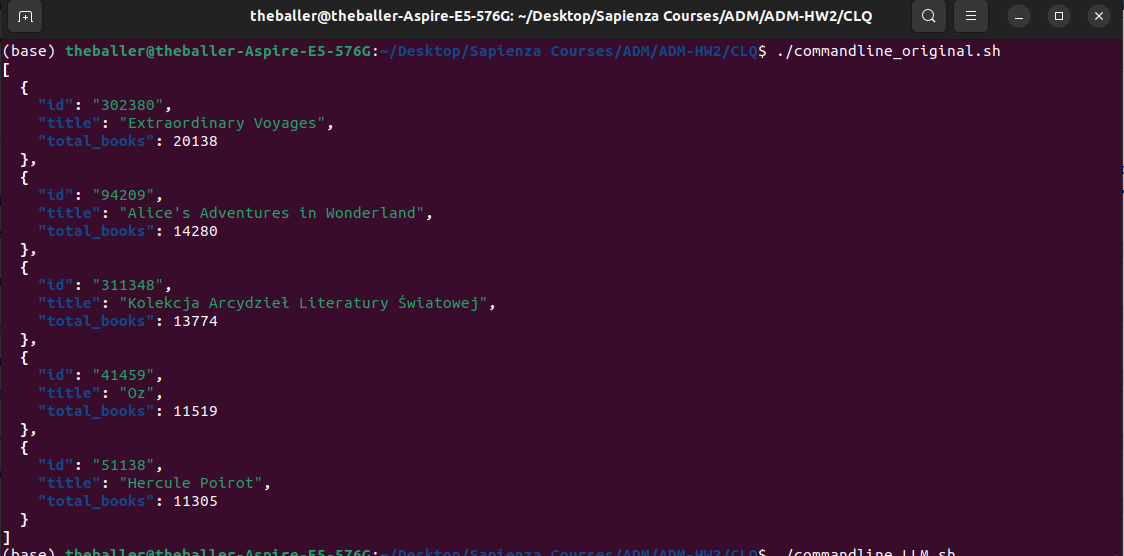

#### CLQ1.2
Try interacting with ChatGPT or any other LLM chatbot tool to implement a more robust script implementation. Your final script should be at most three lines. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.

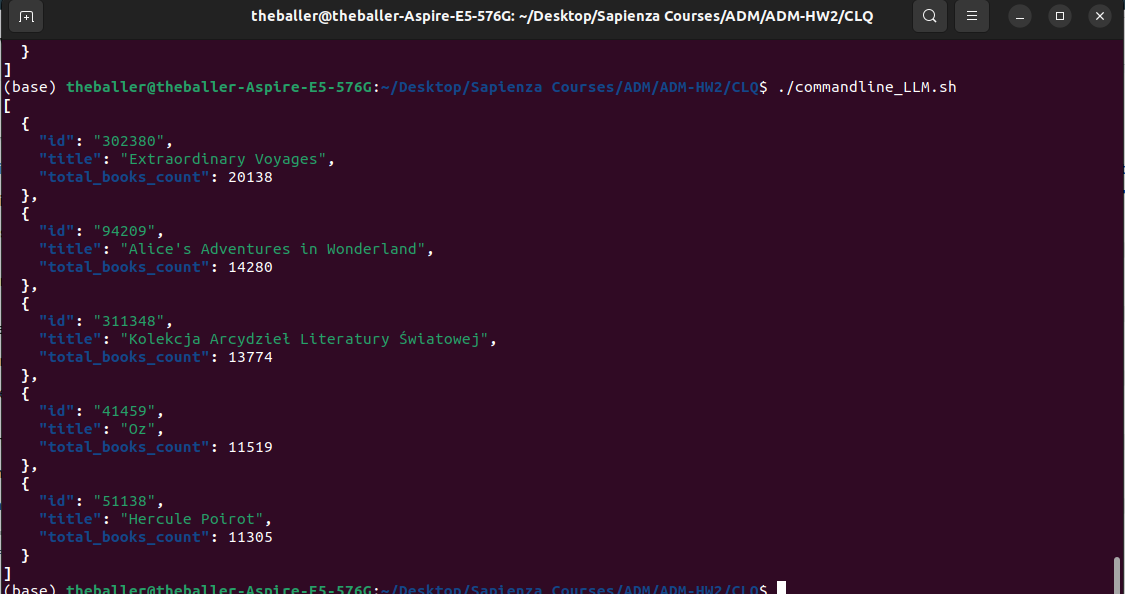

RQ7

In [1]:
def preprocessing_data(df):
  #we are dropping NaN values, duplicates, changing the type of num_pages and average_rating to work better, and filtering
  #the ratings that are impossible to have

  df = df.drop('authors', axis=1)
  df.dropna(inplace=True)
  df = df.astype(str)
  df.drop_duplicates(inplace=True)
  df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce').astype('Int64')
  df = df[pd.notnull(df['num_pages'])]
  df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce').astype('float')
  df= df[df['average_rating'] <= 5]
  return df

In [2]:
def preprocessing_data_authors(df):
  #other dataset, li in the other just a few adjustment to don't have some impossible data, like negative number of fan
  #negative number of ratings

  df.dropna(inplace=True)
  df['fans_count'] = pd.to_numeric(df['fans_count'], errors='coerce').astype('int')
  df= df[df['fans_count'] >= 0]


  df.loc[:, 'ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce').astype('int')
  df= df[df['ratings_count'] >= 0]
  return df

7.1Estimate the probability that a book has over 30% of the ratings above 4.

In [4]:
import re
import pandas as pd
import numpy as np
#working with chunk impose to have some variable to sore the significant data

good_book=0#number of book that we are searching
n=0 #lenght of books

for chunk in pd.read_json('lighter_books.json', lines=True, chunksize=8000):
    work2=preprocessing_data(chunk)
    valori = work2['rating_dist']
    lista_valori = valori.str.split().str[0]#i need a string

    numbers_ratings_5 = valori.str.extract(r'5:(\d+)').astype(int)#i need the value of ratings egual to five, so i extract them and put them in an variable like an integer
    numbers_ratings_4 = valori.str.extract(r'4:(\d+)').astype(int)#i need the value of ratings egual to 4, so i extract them and put them in an variable like an integer
    numbers_ratings_total = valori.str.extract(r'total:(\d+)').astype(int)#i need the tota, so i extract them and put them in an variable like an integer

    prob_over_4 = ((numbers_ratings_5 + numbers_ratings_4) / numbers_ratings_total)#classic definition of probablity, recension over4 divided for the total
    if float(prob_over_4.iloc[0, 0]) >= 0.3:#check if the probability is good for us
      good_book+=1
    n+=1

prob_of_a_book_over_30=good_book/n#classic definition of probablity, book that has a probability of having ratings over 4 over 30% divided for the total
print(f"{prob_of_a_book_over_30:.4f}")


0.8498


How we can see from the result, the probability of a book to have over 30% of rating over 4 is quite high

7.2 Estimate the probability that an author publishes a new book within two years from its last work.

In [9]:

import pandas as pd
import numpy as np
from datetime import datetime
author_years = {}#save author and books in a dictionary, we need this for the fact of the chunk

a=[]#temporary list

for chunk in pd.read_json('lighter_books.json', lines=True, chunksize=2000):
  work=preprocessing_data(chunk)
  authors = work['author_id']
  years = work['publication_date']

  for i in range(len(authors)):#put authors and books in the dictionary
        author = authors.iloc[i]
        year = years.iloc[i]

        if author in author_years:
            author_years[author].append(year)
        else:
            author_years[author] = [year]
  #break

for author, dates in author_years.items():
    check=0
    sorted_dates = sorted(dates) #reorder of years
    for j in range(1, len(sorted_dates)):
        date1 = sorted_dates[j-1]
        date2 = sorted_dates[j]
        try:

            # Every date must be in the format 'YYYY-MM-DD'
            if len(date1) == 7:
                date1 += '-01'
            elif len(date1) == 4:
                date1 = f"{date1}-01-01"
            else:
                if len(date1)!=10 or date1>"2023-12-31": #we avoid future, and any strange data
                    date1=""



            if len(date2) == 7:
                date2 += '-01'
            elif len(date2) == 4:
                date2 = f"{date2}-01-01"
            else:
                if len(date2)!=10 or date2>"2023-12-31":
                    date2=""



            if len(date1) != 0 and len(date2) != 0:
                date1 = datetime.strptime(date1, '%Y-%m-%d')
                date2 = datetime.strptime(date2, '%Y-%m-%d')
                difference_in_days = (date2 - date1).days


                if difference_in_days < 730:
                    check += 1
        except ValueError as e:
          continue

          

            # Handle the case where date conversion fails, the conversion fails
            #for any strange data like 31 of february or 31 of november, we just skip that case


    if check!=0: #just a little adjustment
           check+=1

    prob=check/len(sorted_dates)
    a.append(prob)#vector of all the probabilities
probability=np.array(a)
print(probability.mean())


0.5647173015005764


How we can see from the result, the probability of the an author to write another book in less time of 2 year is just a bit over 50% so it 's not so reliable.

7.3 In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
7.4 Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [10]:
import json
import numpy as np
import pandas as pd
for chunk in pd.read_json('list.json', lines = True, chunksize=1):
  worst_books_list = pd.DataFrame(chunk.loc[0, 'books'])#just a way to localize our list
  break
good_cases=0
total_cases_over_700=0
tot_book=0
#worst_books_list['book_id'] = pd.to_numeric(worst_books_list['book_id'], errors='coerce')
worst=pd.DataFrame(worst_books_list['book_id'])

for chunk in pd.read_json('lighter_books.json', lines=True, chunksize=50000):
  Clean1=preprocessing_data(chunk)

  books=pd.DataFrame(Clean1[['id','num_pages']])
#now we merge the dataset, in this way we associate to each book of the worst list the
#right number of pages
  merged_df = pd.merge(books, worst, left_on='id', right_on='book_id',how='inner')
  # now we calculated the good cases as the number of the worst book with more than 700 pages
  good_cases =good_cases+len(merged_df[merged_df['num_pages']>700])

# the total cases are the number of books with 700 pages
  total_cases_over_700 =total_cases_over_700+len(books[books['num_pages']>700])
#tot of books
  tot_book=tot_book+len(books)


  #break
p_conditionated = good_cases/total_cases_over_700
p_worst=len(worst)/tot_book
print(f'The probability that a book with more than 700 pages is included in the worst book list is: {round(p_conditionated,3)}')
print(f'The probability that a book  is included in the worst book list is: {round(p_worst,3)}')

The probability that a book with more than 700 pages is included in the worst book list is: 0.002
The probability that a book  is included in the worst book list is: 0.002


The probability that a book with more than 700 pages is included in the worst book list is: 0.002
The probability that a book  is included in the worst book list is: 0.002
this means that the condition of having more than 700 pages is not giving any change to the original probability ,
so the probablity are indipendent
P(A|B)=P(A) => A indipendent from B

RQ8

8.1 Can you demonstrate that readers usually rate the longest books as the worst?

The correlation between average_ratings1 and num_pages1 is: 0.090828536485089


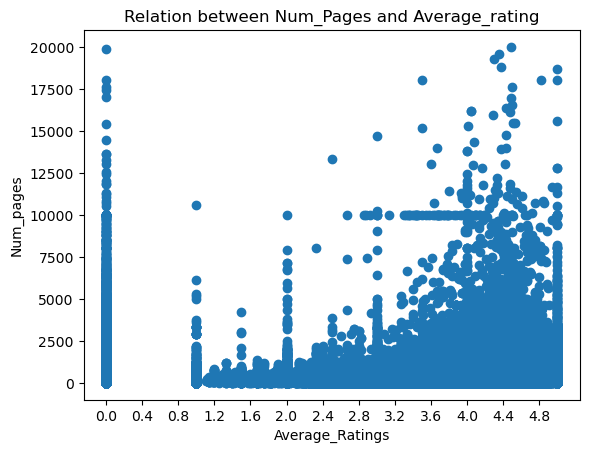

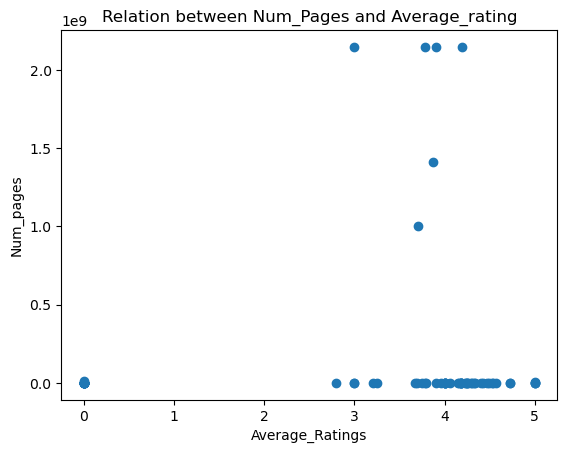

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


average_ratings1 = []
num_pages1 = []
average_ratings_20000 = []
num_pages_20000 = []
#i choosed to divide the problem from before 20000 and after because there are very few cases
#after 20000 but for the fact that this is a studio related to the number of pages i wanted
#to show also that values
for chunk in pd.read_json('lighter_books.json', lines=True, chunksize=50000):
    Clean2 = preprocessing_data(chunk)
    books_rate = pd.DataFrame(Clean2[['average_rating', 'num_pages']])
    books_over_20000 = Clean2[Clean2['num_pages'] >= 20000]
    books_rate_over_20000 = pd.DataFrame(books_over_20000[['average_rating', 'num_pages']])
    books_under_20000 = Clean2[Clean2['num_pages'] <= 20000]
    books_rate_under_20000 = pd.DataFrame(books_under_20000[['average_rating', 'num_pages']])

    # Upload the data in our variable
    average_ratings1.extend(books_rate_under_20000['average_rating'])
    num_pages1.extend(books_rate_under_20000['num_pages'])
    num_pages_20000.extend(books_rate_over_20000['num_pages'])
    average_ratings_20000.extend(books_rate_over_20000['average_rating'])

correlation = np.corrcoef(average_ratings1, num_pages1)[0, 1]

print(f"The correlation between average_ratings1 and num_pages1 is: {correlation}")
plt.scatter(average_ratings1, num_pages1)
plt.ylabel('Num_pages')
plt.xlabel('Average_Ratings')
plt.title('Relation between Num_Pages and Average_rating')
plt.xticks(np.arange(0, 5.1, 0.4))
plt.show()

plt.scatter(average_ratings_20000, num_pages_20000)
plt.ylabel('Num_pages')
plt.xlabel('Average_Ratings')
plt.title('Relation between Num_Pages and Average_rating')

plt.show()


From the plot and the value of correlation we can say that the readers don't


rate worse the books with hign number of pages, i put the second plot just to let see the fact that the book with the highest number of page has still an average rating of 4,and from the first plot we can see that we have incredible amount of books with high number of pages that have a rating of 0

8.2 Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [12]:
import scipy.stats as stats

# we Need variable to store data from chunck
english_ratings = []
other_ratings = []

for chunk in pd.read_json('lighter_books.json', lines=True, chunksize=50000):
    lavoro3 = preprocessing_data(chunk)
    books_lang = pd.DataFrame(lavoro3[['average_rating', 'language']])
    books_english = books_lang[books_lang['language'].isin(['eng', 'en-US'])]
    books_other = books_lang[~books_lang['language'].isin(['eng', 'en-US',""])]

    # Upload data
    english_ratings.extend(books_english['average_rating'])
    other_ratings.extend(books_other['average_rating'])

# Now we do a t test
t_stat, p_value = stats.ttest_ind(english_ratings, other_ratings, equal_var=False)
#Null Hypothesis (H0): The average ratings of English and non-English books are equal.
#Alternative Hypothesis (H1): The average ratings of English and non-English books are not equal.

alpha = 0.05  # significancy level
if p_value < alpha:
    print(f"the p-value is {p_value:.4f}. we reject H0.")
    print("Statistical evidence suggests that the distributions of average ratings differ between English and non-English books.")
else:
    print(f"the p-value is {p_value:.4f}. we  don't reject H0.")
    print("There is not enough statistical evidence to assert that the distributions of average ratings differ between English and non-English books")

the p-value is 0.0000. we reject H0.
Statistical evidence suggests that the distributions of average ratings differ between English and non-English books.


Like we can see from the t test there is a different distribution of the rating dipending from the language that the book is written

8.3About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

C:\Users\Work\AppData\Local\Temp\ipykernel_9560\1684050413.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  english_mode = stats.mode(english_ratings)
C:\Users\Work\AppData\Local\Temp\ipykernel_9560\1684050413.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


Statistics for English Books:
Mean: 3.7511
Median: 3.91
Mode: [4.] (with a frequency of [37116])
1st Quartile (Q1): 3.64
3rd Quartile (Q3): 4.14

Statistics for Non-English Books:
Mean: 3.7117
Median: 3.87
Mode: [4.] (with a frequency of [39172])
1st Quartile (Q1): 3.59
3rd Quartile (Q3): 4.1


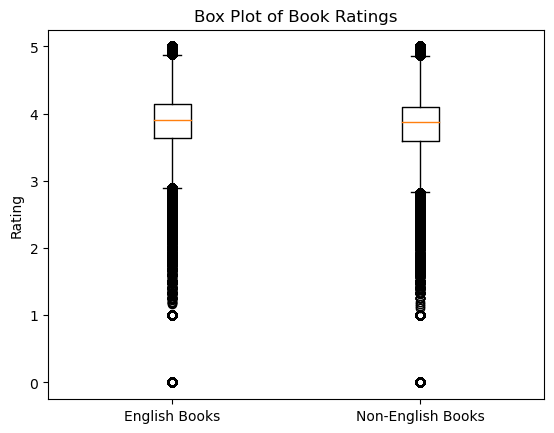

In [13]:
import numpy as np
#here we have just a lot of calculation
# Calculate statistics for English books
english_mean = np.mean(english_ratings)
english_median = np.median(english_ratings)
english_mode = stats.mode(english_ratings)
english_q1 = np.percentile(english_ratings, 25)
english_q3 = np.percentile(english_ratings, 75)

# Calculate statistics for non-English books
other_mean = np.mean(other_ratings)
other_median = np.median(other_ratings)
other_mode = stats.mode(other_ratings)
other_q1 = np.percentile(other_ratings, 25)
other_q3 = np.percentile(other_ratings, 75)

# Print the statistics
print("Statistics for English Books:")
print(f"Mean: {english_mean:.4f}")
print(f"Median: {english_median}")
print(f"Mode: {english_mode.mode} (with a frequency of {english_mode.count})")
print(f"1st Quartile (Q1): {english_q1}")
print(f"3rd Quartile (Q3): {english_q3}")
print("\nStatistics for Non-English Books:")
print(f"Mean: {other_mean:.4f}")
print(f"Median: {other_median}")
print(f"Mode: {other_mode.mode} (with a frequency of {other_mode.count})")
print(f"1st Quartile (Q1): {other_q1}")
print(f"3rd Quartile (Q3): {other_q3}")

data = [english_ratings, other_ratings]

fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(data)

# Set labels and title
ax.set_xticklabels(['English Books', 'Non-English Books'])
ax.set_ylabel('Rating')
plt.title('Box Plot of Book Ratings')

# Show the plot
plt.show()

8.4 It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

Now i will start with correlation and linear regression

C:\Users\Work\AppData\Local\Temp\ipykernel_9560\3260211212.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce').astype('int')
C:\Users\Work\AppData\Local\Temp\ipykernel_9560\3260211212.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce').astype('int')


The correlation between fans_count and ratings_count is: 0.5806


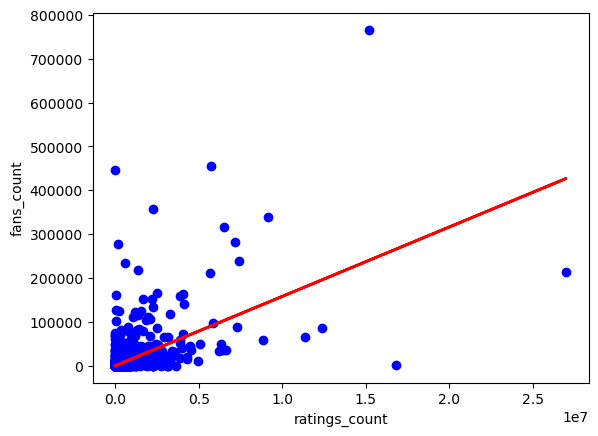

Mean Squared Error: 4694640.048272197
R-squared: 0.33705943775991376


In [14]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

df_authors = pd.read_json('lighter_authors.json', lines = True)
Clean4=preprocessing_data_authors(df_authors)
Aut = pd.DataFrame(Clean4[['ratings_count','fans_count']])
correlation_matrix = Aut[['fans_count', 'ratings_count']].corr()
correlation_coefficient = correlation_matrix.loc['fans_count', 'ratings_count']
print(f"The correlation between fans_count and ratings_count is: {correlation_coefficient:.4f}")



X = Aut[['ratings_count']]  # Independent variable(s)
Y = Aut['fans_count']  # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Optional: Visualize the results
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.xlabel('ratings_count')
plt.ylabel('fans_count')
plt.show()

# Optional: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



  From the plot we can say that the fans are a bit lazy, ans also the fact that the correlation is over 0.5 it means that the 2 variable are influencing each other

Now f test and t test

In [15]:
from scipy.stats import f_oneway
import statsmodels.api as sm


# Reshape X for compatibility with f_oneway
X_reshaped = X.values.reshape(-1)

# Perform the F-test (ANOVA)
f_statistic, p_value_f = f_oneway(X_reshaped, Y)

print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value (F-test): {p_value_f:.4f}')


X_with_constant = sm.add_constant(X)

# Fit the regression model using statsmodels
model_stats = sm.OLS(Y, X_with_constant).fit()

# Perform a t-test for the coefficient of 'ratings_count'
t_test_result = model_stats.t_test([0, 1])  # [0, 1] indica il coefficiente di 'ratings_count'

# Extract  t-statistic and the p-value from the test
t_statistic = t_test_result.tvalue[0][0]
p_value_t = t_test_result.pvalue

print(f'T-statistic: {t_statistic:.4f}')
print(f'p-value (t-test): {p_value_t:.4f}')

F-statistic: 799.4245
p-value (F-test): 0.0000
T-statistic: 422.8882
p-value (t-test): 0.0000


In practical terms, this result suggests that the overall model is 

statistically significant and that at least one of the independent variables(fans) is likely contributing meaningfully to explaining the variation in the dependent (recension) variable.
Also the result of this T-test is giving the same information of the f-test before